In [ ]:
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from google.colab import files

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/BTT CARI-CONNECT /CariConnect Dataset /isbndb-caribbean-books.csv', encoding= 'latin1')

In [ ]:
df.head()

,title,title_long,subjects,binding,date_published,publisher,pages,synopsis,image,isbn,isbn10,isbn13,language,authors,msrp,edition
0,Britain's Black Debt: Reparations for Caribbea...,Britain's Black Debt: Reparations for Caribbea...,History\nAfrica\nWest Africa\nAmericas\nCaribb...,Paperback,2/25/2013,University Press of the West Indies,248.0,Since the mid-nineteenth-century abolition of ...,https://images.isbndb.com/covers/26/86/9789766...,976640268X,976640268X,9789766402686,en,Hilary McD. Beckles,NaN,NaN
1,Maharani's Misery: Narratives of a Passage fro...,Maharani's Misery: Narratives of a Passage fro...,History\nAmericas\nCaribbean & West Indies,Paperback,10/1/2002,University Press of the West Indies,160.0,Maharani?s Misery sheds new light on the ordea...,https://images.isbndb.com/covers/12/14/9789766...,9766401217,9766401217,9789766401214,en,Verene A. Shepherd,NaN,NaN
2,The Birth of Caribbean Civilization: A Century...,The Birth of Caribbean Civilization: A Century...,Politics & Social Sciences\nSocial Sciences\nH...,Paperback,2004-07,James Currey Ltd,500.0,"For more than a century, Caribbean intellectua...",https://images.isbndb.com/covers/87/20/9780852...,852558724,852558724,9780852558720,en,NaN,NaN,NaN
3,The Lonely Londoners (Longman Caribbean Writer...,The Lonely Londoners (Longman Caribbean Writer...,Literature & Fiction\nHistory & Criticism\nMov...,Paperback,1/11/1989,Longman,141.0,Looking for a better life a group of West Indi...,https://images.isbndb.com/covers/26/45/9780582...,582642647,582642647,9780582642645,en,Samuel Selvon,22.80,15th Printing
4,The Oxford Book of Caribbean Short Stories: Re...,The Oxford Book of Caribbean Short Stories: Re...,Literature & Fiction\nHistory & Criticism\nReg...,Paperback,3/21/2002,Oxford University Press,476.0,"Some of the freshest, most vital, and diverse ...",https://images.isbndb.com/covers/22/93/9780192...,192802291,192802291,9780192802293,en,NaN,29.95,Reissue


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           6000 non-null   object 
 1   title_long      5997 non-null   object 
 2   subjects        5738 non-null   object 
 3   binding         5948 non-null   object 
 4   date_published  5949 non-null   object 
 5   publisher       5980 non-null   object 
 6   pages           5663 non-null   float64
 7   synopsis        5462 non-null   object 
 8   image           6000 non-null   object 
 9   isbn            6000 non-null   object 
 10  isbn10          5889 non-null   object 
 11  isbn13          6000 non-null   int64  
 12  language        5997 non-null   object 
 13  authors         5425 non-null   object 
 14  msrp            2774 non-null   float64
 15  edition         3046 non-null   object 
dtypes: float64(2), int64(1), object(13)
memory usage: 750.1+ KB


In [ ]:
df.isna().sum()

,0
title,0
title_long,3
subjects,262
binding,52
date_published,51
publisher,20
pages,337
synopsis,538
image,0
isbn,0


In [ ]:
dif = 0
for i in range(len(df['title'])):
  if df['title'][i] != df['title_long'][i]:
    dif+=1
dif

42

In [ ]:
# only 42 of the long titles are different so we can drop title_long

In [ ]:
df['language'].unique()

array(['en', 'fr', 'nl', 'es', 'fi', 'am', 'zh', 'Eng English', 'asa',
       'no', 'eng', 'it', 'English', 'en_US', 'f', 'de', 'my', 'hu', 'ja',
       'Spa', 'ba', 'bm', nan, 'spa', 'Spa,eng', 'Spa Spanish; Castilian',
       'pt', 'pt-br', 'sv'], dtype=object)

In [ ]:
count = 0
for i in range(len(df['language'])):
  if df['language'][i] not in ['en', 'Eng English', 'eng', 'English', 'en_US']:
    count+=1
count
    #print(df['synopsis'][i])

169

In [ ]:
df['date_published'].tail()

,date_published
5995,1966-06
5996,3/1/2021
5997,1969
5998,2020
5999,7/11/2006


In [ ]:
df['binding'].unique()

array(['Paperback', 'Product Bundle', 'Hardcover', 'Plastic Comb',
       'Library Binding', nan, 'Mass Market Paperback', 'paperback',
       'Audio CD', 'Flexibound', 'hardcover', 'Kindle Edition',
       'Spiral-bound', 'spiral_bound', 'Cards', 'Book',
       'Textbook Binding', 'Misc. Supplies', 'Perfect Paperback',
       'Unknown Binding', 'Map', 'calendar', 'map', 'Calendar',
       'Pamphlet', 'CD-ROM', 'Digital', 'eBook', 'unknown_binding',
       'ePub', 'DVD-ROM', 'Vinyl Bound', 'Sheet music', 'Turtleback',
       'MP3 CD', 'Audio Cassette', 'cd_rom', 'dvd_rom', 'Board book',
       'Staple Bound', 'Film'], dtype=object)

In [ ]:
# drop irrelevant data like binding, date published, pages, image, isbn, language, author, msrp, edition

In [ ]:
# reasoning:
# image, isbn, author, msrp, edition, are for id or don't provide relevant info

# binding (ex ebook specific pub) / determined by publisher, somewhat irrelevant
# pages (ex childrens books specifc pub) / this info may already be derived from subject data

# date (ex outdated pub) / somewhat irrelevant, though publishers may be outdated for older books //different formats
  # drop dated books? small issue

# language (ex regional pub) / somewhat irrelevant, though language may need to match, but could be derived from title and synopsis //consolidate categories
  # dont want to neglect authors due to language, but could be derived from title

# too many unique publishers to derive meaningful relationship

In [ ]:
# retain title, subject, synopsis. publisher.
# Not using publisher data in model, but will retrieve after matching
# Drop 20 missing publishers. Fill missing data ~ 500 points.

In [ ]:
# Drop columns, missing publishers, if both synopsis and subject are missing. df_match to retrieve publishers. df_model to train model without publishers data.
df_match = df.copy()
df_match.drop_duplicates(inplace=True)
df_match.dropna(subset=['subjects', 'synopsis'], inplace=True, how='all') #missing both subject and synopsis
df_match.dropna(subset='publisher', inplace=True) #missing publisher
df_match.drop(['title_long', 'binding', 'pages', 'image', 'isbn', 'isbn10', 'isbn13', 'authors', 'msrp', 'edition', 'date_published', 'language'], axis=1, inplace=True)
df_model = df_match.copy()
df_model.drop('publisher', axis=1, inplace=True) #model wont use publisher data

In [ ]:
[df_model.isna().sum(), df_model.info]

[title         0
 subjects    129
 synopsis    398
 dtype: int64,
 <bound method DataFrame.info of                                                   title  \
 0     Britain's Black Debt: Reparations for Caribbea...   
 1     Maharani's Misery: Narratives of a Passage fro...   
 2     The Birth of Caribbean Civilization: A Century...   
 3     The Lonely Londoners (Longman Caribbean Writer...   
 4     The Oxford Book of Caribbean Short Stories: Re...   
 ...                                                 ...   
 5995  Caribbean Narrative: An Anthology of West Indi...   
 5996  Caribbean Globalizations, 1492 to the Present Day   
 5997   The Caribbean;: The story of our sea of destiny,   
 5998  To the Caribbean and Back: Sailing the Atlanti...   
 5999  Pirates of the Caribbean: Dead Man's Chest Dea...   
 
                                                subjects  \
 0     History\nAfrica\nWest Africa\nAmericas\nCaribb...   
 1            History\nAmericas\nCaribbean & West Indies   


In [ ]:
# filling missing data
df_model['subjects'].fillna(value='subject', inplace=True) # uncategorized
df_model['synopsis'].fillna(value='', inplace=True) # empty string

<ipython-input-87-b32767959eec>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_model['subjects'].fillna(value='subject', inplace=True) # uncategorized
<ipython-input-87-b32767959eec>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

In [ ]:
df_model.isna().sum()

,0
title,0
subjects,0
synopsis,0


In [ ]:
#Text Preprocessing
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
import sys
!{sys.executable} -m pip install contractions
import contractions

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Multilingual data https://stackoverflow.com/questions/52039155/stemming-of-the-multilingual-text-corpus.
Stemming used for efficiency, lemmatizing requires pos tagging and costly.
Vectorize. Index needed to refer back to publishers

### TF-IDF

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
# Apply TF-IDF to the 'title' column
title_tfidf_matrix = tfidf.fit_transform(df_model['title'])
subject_tfidf_matrix = tfidf.fit_transform(df_model['subjects'])
synopsis_tfidf_matrix = tfidf.fit_transform(df_model['synopsis'])
print(title_tfidf_matrix)

  (0, 1088)	0.331050313257503
  (0, 973)	0.2536447980669378
  (0, 1886)	0.4011012175395114
  (0, 5189)	0.4450695163894528
  (0, 2646)	0.19039518357257276
  (0, 1210)	0.05252527168731222
  (0, 5663)	0.2727749812436107
  (0, 580)	0.09602928603384016
  (0, 4281)	0.3825925073673677
  (0, 2792)	0.4450695163894528
  (1, 1210)	0.05438847891354077
  (1, 3880)	0.48264419350302745
  (1, 4119)	0.48264419350302745
  (1, 4271)	0.353797769313172
  (1, 4417)	0.11101406302074295
  (1, 4586)	0.4081542550427845
  (1, 2716)	0.18882819393348316
  (1, 3269)	0.3863673447026501
  (1, 6155)	0.18905539567751464
  (1, 6082)	0.07991510581033065
  (2, 1210)	0.04994786698952316
  (2, 580)	0.1826342959050599
  (2, 4417)	0.20390037612712597
  (2, 6082)	0.0733903421313425
  (2, 965)	0.38902598370278185
  :	:
  (5853, 5856)	0.3972607804633727
  (5853, 5469)	0.386256208629236
  (5853, 4495)	0.46519897499333246
  (5853, 1956)	0.5731009581374654
  (5854, 1210)	0.04708262856605562
  (5854, 580)	0.08607877809201238
  (5854

# Sentence Transformed w/ Kmeans ++

In [ ]:
!pip install -U sentence-transformers

In [ ]:
# first subject
# if "subject" then synopsis
# then title, leave other ungrouped
# about 40-50 clusters, need to fine tune

from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

# Initialize the model
embedder = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Extract the corpus and identify rows where the subject is "subject"
corpus = df_model["subjects"].tolist()
corpus_rest = df_model[df_model["subjects"] != "subject"]["subjects"].tolist()    # All other entries


# Encode the remaining corpus (excluding "subject")
corpus_embeddings = embedder.encode(corpus_rest)
# print(corpus_embeddings.shape)  # Should be (number_of_sentences, embedding_dimensionality)

# Perform KMeans clustering on the remaining corpus
num_clusters = 50
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

# Prepare the final clusters
clustered_sentences = [[] for i in range(num_clusters + 1)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(corpus_rest[sentence_id])


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


### The elbow method

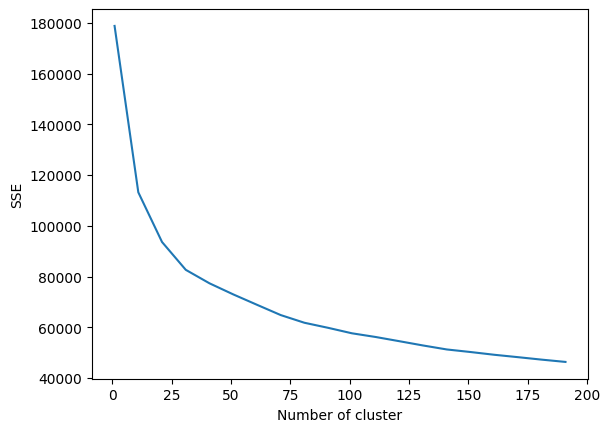

In [ ]:
# The elbow method
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

sse = {}
for k in range(1, 200, 10):
    kmeans = KMeans(n_clusters=k, random_state = 123).fit(corpus_embeddings)
    #df_model["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

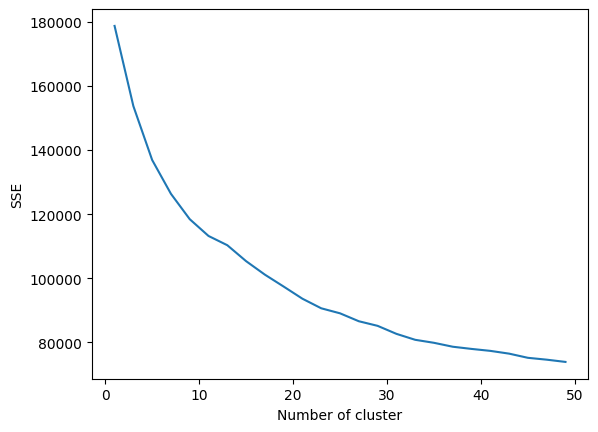

In [ ]:
# The elbow method
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

sse = {}
for k in range(1, 50, 2):
    kmeans = KMeans(n_clusters=k, random_state = 123).fit(corpus_embeddings)
    #df_model["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

### The silhouette analysis

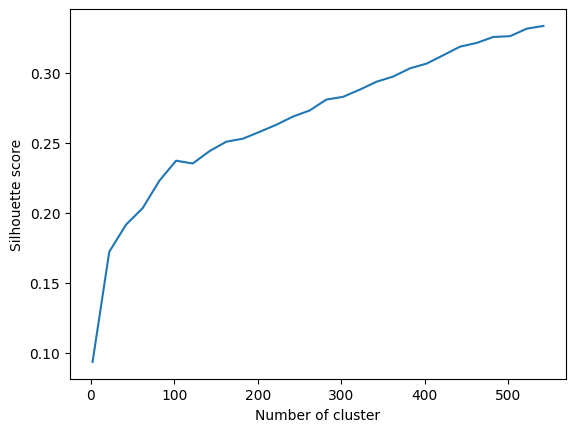

In [ ]:
# The silhouette analysis
from sklearn.metrics import silhouette_samples, silhouette_score

sse = {}
for k in range(2, 550, 20):
    silhouette_avg = silhouette_score(corpus_embeddings, KMeans(n_clusters=k, random_state = 123).fit_predict(corpus_embeddings))
    sse[k] = silhouette_avg

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette score")
plt.show()


# even first, try larger number

In [ ]:
silhouette_score(corpus_embeddings, KMeans(n_clusters=500, random_state = 123).fit_predict(corpus_embeddings))

0.3257341

we dont consider cluster > 500, which means only average 12 data points in most clusters

### Gap-Statistics

In [ ]:
# custome function from github, but apply the theory correctly
def optimalK(data, maxClusters):
    """
    Calculates KMeans optimal K using Gap Statistic from Tibshirani, Walther, Hastie
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    nrefs=3
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):

        # Holder for reference dispersion results
        refDisps = np.zeros(nrefs)

        # For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):

            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)

            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)

            refDisp = km.inertia_
            refDisps[i] = refDisp

        # Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)

        origDisp = km.inertia_

        # Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)

        # Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap

        resultsdf = pd.concat([resultsdf,pd.DataFrame([{'clusterCount':k, 'gap':gap}])], ignore_index=True)

    return (gaps.argmax() + 1, resultsdf)  # Plus 1 because index of 0 means 1 cluster is optimal, index 2 = 3 clusters are optimal



In [ ]:
k, gapdf = optimalK(corpus_embeddings,maxClusters=500)
print('Optimal k is: ', k)

Optimal k is:  497


not quite useful, the more cluster is always the best here

### Kmeans++

In [ ]:
# use Kmeans ++, better initialized point
num_clusters = 30
clustering_model = KMeans(n_clusters=num_clusters, init='k-means++', random_state = 123)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = [[] for i in range(num_clusters + 1)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(corpus_rest[sentence_id])

for i, cluster in enumerate(clustered_sentences):
    print(f"Cluster {i+1}")
    print(cluster)
    print("")

Cluster 1
['Literature & Fiction\nHistory & Criticism\nRegional & Cultural\nUnited States', 'Literature & Fiction\nHistory & Criticism\nRegional & Cultural\nShort Stories & Anthologies\nAnthologies', 'Literature & Fiction\nHistory & Criticism\nCriticism & Theory\nMovements & Periods\nRegional & Cultural', 'Literature & Fiction\nHistory & Criticism\nRegional & Cultural', 'Literature & Fiction\nHistory & Criticism\nCriticism & Theory\nMovements & Periods\nRegional & Cultural', 'Literature & Fiction\nGenre Fiction\nPolitical\nHistory & Criticism\nRegional & Cultural', 'Literature & Fiction\nHistory & Criticism\nMovements & Periods\nRegional & Cultural', 'Literature & Fiction\nHistory & Criticism\nRegional & Cultural', 'Literature & Fiction\nHistory & Criticism\nMovements & Periods\nRegional & Cultural', 'Literature & Fiction\nHistory & Criticism\nCriticism & Theory\nGenres & Styles\nPoetry\nAnthologies\nRegional & Cultural\nThemes & Styles', 'Literature & Fiction\nHistory & Criticism\nReg

In [ ]:
import pandas as pd
from collections import Counter

# Number of clusters
num_clusters = 30

# Prepare data for summary
cluster_summary = []

# Loop through each cluster
for cluster_id in range(num_clusters):
    # Get all sentences in the current cluster
    sentences = clustered_sentences[cluster_id]

    # Count occurrences of each unique sentence
    sentence_counts = Counter(sentences)

    # Get the top 3 most common sentences in the cluster
    top_sentences = ', '.join([sentence for sentence, count in sentence_counts.most_common(1)])

    # Add the cluster summary details to the list
    cluster_summary.append({
        'Cluster': cluster_id,
        'Num_books': len(sentences),
        'Top_subjects': top_sentences
    })

# Convert the summary list to a DataFrame
cluster_summary_df = pd.DataFrame(cluster_summary)

# Display the summary table
cluster_summary_df

,Cluster,Num_books,Top_subjects
0,0,181,Literature & Fiction\nHistory & Criticism\nReg...
1,1,286,Children's Books\nGeography & Cultures\nExplor...
2,2,245,Politics & Social Sciences\nSocial Sciences\nF...
3,3,159,Caribbean & Latin American\nEnglish & College ...
4,4,121,Business & Money\nEconomics
5,5,189,History\nAmericas\nCaribbean & West Indies\nPo...
6,6,122,Politics & Social Sciences\nPolitics & Governm...
7,7,256,Travel\nCaribbean\nGeneral
8,8,209,History\nAmericas\nCaribbean & West Indies
9,9,238,Engineering & Transportation\nTransportation\n...


In [ ]:
import pandas as pd

# Group by Cluster and count the number of documents per cluster
cluster_summary = df_model.groupby('Cluster').size().reset_index(name='Num_Documents')

# Extract the top 3 most common subjects for each cluster
top_subjects = (
    df_model.groupby('Cluster')['subjects']
    .apply(lambda x: ', '.join(x.value_counts().index[:3]))  # Join top 3 subjects
    .reset_index(name='Top_Subjects')
)

# Merge the document count and top subjects into a single summary table
cluster_summary = cluster_summary.merge(top_subjects, on='Cluster')

# Display the summary table
cluster_summary

,Cluster,Num_Documents,Top_Subjects
0,-1,2245,"Travel\nMexico\nGeneral, Mystery, Thriller & S..."
1,0,129,subject
2,1,229,Subjects
3,2,17,Caribbean & West Indian\nSoul Food\nProfession...
4,3,8,"Travel\nCaribbean\nSaint Kitts\nGeneral, Trave..."
...,...,...,...
58,57,6,Central America\nBlack Studies (Global)\nSocia...
59,58,46,"Business & Money\nEconomics, Business & Money,..."
60,59,6,"Literature & Fiction\nUnited States, Literatur..."
61,60,1939,"Travel\nCaribbean\nGeneral, History\nAmericas\..."


In [ ]:
# Check synopsis when subjects contents is missing
mask_subject = df_model["subjects"] == "subject"
subject_with_empty_synopsis = df_model[mask_subject & (df_model['synopsis'] == "")]
print(subject_with_empty_synopsis.shape[0])
# no corresponding more detailed synopsis information

0


In [ ]:
# Cluster further with info of title

# Encode the titles of the rows with 'subjects' == "subject"
subject_titles = df_model[mask_subject]["title"].tolist()
title_subject_embeddings = embedder.encode(subject_titles)

# Calculate distance between these titles to the centroid of closest existing cluster
# Assign to  the nearest centroid
closest_clusters = clustering_model.predict(title_subject_embeddings)

# Add these titles to the respective clusters
for title_id, cluster_id in enumerate(closest_clusters):
    clustered_sentences[cluster_id].append(subject_titles[title_id])

print("After adding titles:")
for i, cluster in enumerate(clustered_sentences):
  print(f"Cluster {i+1}")
  print(cluster)
  print("")

# Next step: use loss function to minimize loss and find best hyperparameters

After adding titles:
Cluster 1
['Literature & Fiction\nHistory & Criticism\nRegional & Cultural\nUnited States', 'Literature & Fiction\nHistory & Criticism\nRegional & Cultural\nShort Stories & Anthologies\nAnthologies', 'Literature & Fiction\nHistory & Criticism\nCriticism & Theory\nMovements & Periods\nRegional & Cultural', 'Literature & Fiction\nHistory & Criticism\nRegional & Cultural', 'Literature & Fiction\nHistory & Criticism\nCriticism & Theory\nMovements & Periods\nRegional & Cultural', 'Literature & Fiction\nGenre Fiction\nPolitical\nHistory & Criticism\nRegional & Cultural', 'Literature & Fiction\nHistory & Criticism\nMovements & Periods\nRegional & Cultural', 'Literature & Fiction\nHistory & Criticism\nRegional & Cultural', 'Literature & Fiction\nHistory & Criticism\nMovements & Periods\nRegional & Cultural', 'Literature & Fiction\nHistory & Criticism\nCriticism & Theory\nGenres & Styles\nPoetry\nAnthologies\nRegional & Cultural\nThemes & Styles', 'Literature & Fiction\nHis

# Hierarchical Clustering

In [ ]:
# Hierarchical clustering
subject_tfidf_matrix = tfidf.fit_transform(df_model['subjects'])
X = subject_tfidf_matrix

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from scipy.cluster import  hierarchy

X = X.todense()
threshold = 0.8      # cosine distance, 0-identical, 1-completely different
Z = hierarchy.linkage(X,"average", metric="cosine")   # Z is the cosine similarity matrix
C = hierarchy.fcluster(Z, threshold, criterion="distance")    # C is the clustering of the documents docs.

# find number of cluster
C.max()

143

In [ ]:
df_model['Cluster'] = C  # Add the cluster labels to the dataframe


for cluster_num in sorted(df_model['Cluster'].unique()):
  print(f"Cluster {cluster_num}:")
  cluster_docs = df_model[df_model['Cluster'] == cluster_num]['subjects']
  print(cluster_docs)

# 1st cluster: Subjects, 2nd cluster:subject

Cluster 1:
99      Subjects
127     Subjects
152     Subjects
158     Subjects
162     Subjects
          ...   
5926    Subjects
5982    Subjects
5988    Subjects
5995    Subjects
5997    Subjects
Name: subjects, Length: 229, dtype: object
Cluster 2:
71      subject
115     subject
119     subject
132     subject
178     subject
         ...   
5801    subject
5858    subject
5893    subject
5919    subject
5993    subject
Name: subjects, Length: 145, dtype: object
Cluster 3:
1316    Computers & Technology\nGames & Strategy Guide...
3190    Computers & Technology\nGames & Strategy Guide...
4905      Computers & Technology\nGames & Strategy Guides
Name: subjects, dtype: object
Cluster 4:
1562    History\nAmericas\nUnited States\nScience & Ma...
1702    Educational technology\nEducational technology...
3148    General\nRadio\nSocial Sciences -> History -> ...
Name: subjects, dtype: object
Cluster 5:
3400    Government & Business\nMobile & Wireless Commu...
5011    Public Affairs & Admin

# DBSCAN

In [1]:
!pip install dbscan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 12.4 MB/s eta 0:00:00


In [ ]:
from scipy.sparse import hstack
import dbscan

# Compute cosine distance matrices for each matrix
subject_distances = cosine_distances(subject_tfidf_matrix)
title_distances = cosine_distances(title_tfidf_matrix)
combined_distance_matrix = (0.9 * subject_distances) + (0.1 * title_distances)

dbscan_cluster = dbscan.DBSCAN(min_cluster_size=5, metric='precomputed', cluster_selection_epsilon = 0.3)
C = dbscan_cluster.fit_predict(combined_distance_matrix)
df_model['Cluster'] = C

for cluster_num in sorted(set(C)):
  print(f"Cluster {cluster_num}:")
  cluster_docs = df_model[df_model['Cluster'] == cluster_num]['subjects']
  print(cluster_docs)

Cluster -1:
0       History\nAfrica\nWest Africa\nAmericas\nCaribb...
6       History\nAmericas\nCaribbean & West Indies\nNa...
7       History\nAmericas\nCaribbean & West Indies\nCe...
9       History\nAmericas\nCaribbean & West Indies\nRe...
11      History\nAmericas\nSouth America\nUnited State...
                              ...                        
5978    Sports & Outdoors\nTravel\nCaribbean\nVirgin I...
5985    Business & Money\nEconomics\nDevelopment & Gro...
5986    Christian Books & Bibles\nLiterature & Fiction...
5990    Law\nForeign & International Law\nRules & Proc...
5991    Business & Money\nEconomics\nEconomic Policy &...
Name: subjects, Length: 2245, dtype: object
Cluster 0:
71      subject
115     subject
119     subject
132     subject
178     subject
         ...   
5801    subject
5858    subject
5893    subject
5919    subject
5993    subject
Name: subjects, Length: 129, dtype: object
Cluster 1:
99      Subjects
127     Subjects
152     Subjects
158     Subjec

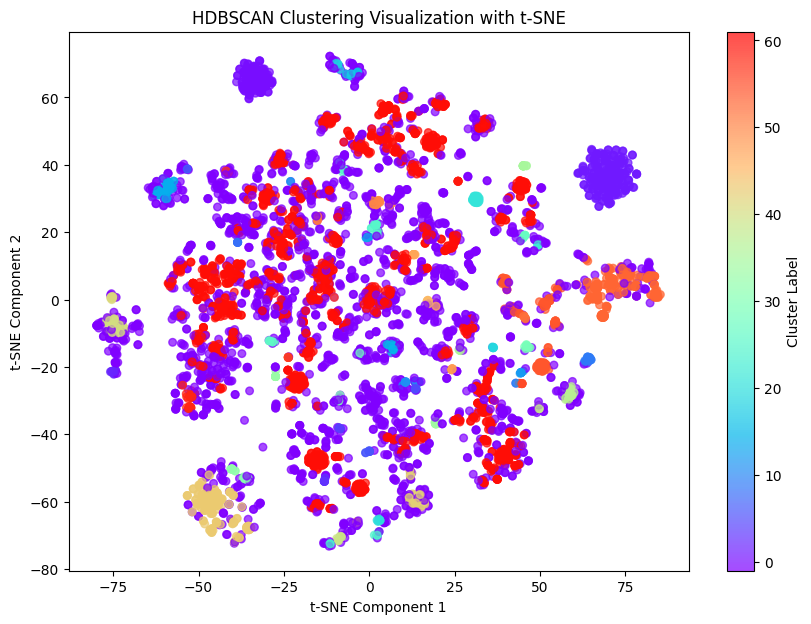

In [ ]:
# TSNE from chatgpt, not really understand, PCA perform even worse
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Apply t-SNE to reduce to 2 dimensions
tsne = TSNE(n_components=2, metric='precomputed', random_state=42,init="random")
tsne_projected = tsne.fit_transform(combined_distance_matrix)

# Plot the t-SNE results
plt.figure(figsize=(10, 7))
plt.scatter(tsne_projected[:, 0], tsne_projected[:, 1], c=C, cmap='rainbow', s=30, alpha=0.7)
plt.colorbar(label="Cluster Label")
plt.title("DBSCAN Clustering Visualization with t-SNE")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

In [ ]:
import pandas as pd

# Count the number of documents in each cluster
cluster_summary = df_model.groupby('Cluster').size().reset_index(name='Num_Documents')

#  top 3 terms for each cluster
top_subjects = df_model.groupby('Cluster')['subjects'].apply(lambda x: ', '.join(x.value_counts().index[:3]))
cluster_summary['Top_Subjects'] = top_subjects.values

cluster_summary

,Cluster,Num_Documents,Top_Subjects
0,-1,2245,"Travel\nMexico\nGeneral, Mystery, Thriller & S..."
1,0,129,subject
2,1,229,Subjects
3,2,17,Caribbean & West Indian\nSoul Food\nProfession...
4,3,8,"Travel\nCaribbean\nSaint Kitts\nGeneral, Trave..."
...,...,...,...
58,57,6,Central America\nBlack Studies (Global)\nSocia...
59,58,46,"Business & Money\nEconomics, Business & Money,..."
60,59,6,"Literature & Fiction\nUnited States, Literatur..."
61,60,1939,"Travel\nCaribbean\nGeneral, History\nAmericas\..."


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word clouds for each cluster
for cluster_num in sorted(df_model['Cluster'].unique()):
    # Concatenate all subjects in the cluster
    text = " ".join(df_model[df_model['Cluster'] == cluster_num]['subjects'])
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Cluster {cluster_num}')
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

# Albert

In [ ]:
from transformers import AlbertTokenizer, AlbertModel, RobertaTokenizer, RobertaModel
from sklearn.cluster import KMeans
import torch
import pandas as pd
import numpy as np

corpus = df_model["subjects"].tolist()
corpus_rest = df_model[df_model["subjects"] != "subject"]["subjects"].tolist()


albert_tokenizer = AlbertTokenizer.from_pretrained('albert-base-v2')
albert_model = AlbertModel.from_pretrained('albert-base-v2')


def get_embeddings(model, tokenizer, texts):
    embeddings = []
    for text in texts:
        inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True)
        with torch.no_grad():
            outputs = model(**inputs)

        # Take the mean of the last hidden state as the sentence embedding
        embedding = outputs.last_hidden_state.mean(dim=1).squeeze().cpu().numpy()
        embeddings.append(embedding)

    return np.array(embeddings)

corpus_embeddings_albert = get_embeddings(albert_model, albert_tokenizer, corpus_rest)


num_clusters = 50
clustering_model = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)

# Cluster embeddings from ALBERT
clustering_model.fit(corpus_embeddings_albert)
cluster_assignment_albert = clustering_model.labels_
clustered_sentences_albert = [[] for i in range(num_clusters + 1)]
for sentence_id, cluster_id in enumerate(cluster_assignment_albert):
    clustered_sentences_albert[cluster_id].append(corpus_rest[sentence_id])


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/760k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/684 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/47.4M [00:00<?, ?B/s]

In [ ]:
for i, cluster in enumerate(clustered_sentences_albert):
    print(f"Cluster {i+1}")
    print(cluster)
    print("")

Cluster 1
['Literature & Fiction\nGenre Fiction\nHistorical\nAction & Adventure\nFantasy\nScience Fiction & Fantasy', 'Literature & Fiction\nGenre Fiction\nFamily Saga\nHistorical\nAction & Adventure\nMystery, Thriller & Suspense\nSelf Service\nCustom Stores', "Literature & Fiction\nAction & Adventure\nMen's Adventure\nMystery, Thriller & Suspense\nWar & Military", "Literature & Fiction\nGenre Fiction\nSea Stories\nAction & Adventure\nMystery, Thriller & Suspense\nSea Adventures\nWomen's Adventure", 'Literature & Fiction\nGenre Fiction\nUnited States\nMystery, Thriller & Suspense\nThrillers & Suspense\nSuspense\nCrime', 'Literature & Fiction\nAction & Adventure\nMystery, Thriller & Suspense\nThrillers & Suspense\nSuspense', 'Literature & Fiction\nAction & Adventure\nMystery, Thriller & Suspense\nContemporary\nThrillers & Suspense', "Literature & Fiction\nAction & Adventure\nMen's Adventure\nMystery, Thriller & Suspense\nThrillers & Suspense\nSpies & Politics\nSuspense", "Literature & F